# Superstore End-to-End Data Analysis (Pandas)

### Objective
Analyze sales performance, profitability, customer behavior, and regional trends using cleaned data from SQL Server. This notebook focuses on data cleaning, feature engineering and exploratory data analysis using Pandas and Matplotlib, before building interactive dashboards in Power BI.

### Tools Used
- Jupyter Notebook : for analysis & feature engineering using Pandas, Numpy, Matplotlib
- MS- SQL Server: for data validation & analytics view




## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc                     #pyodbc library used to connect Python to SQL database 

pd.set_option("display.float_format", "{:,.2f}".format)   #sets numeric display format to float with 2 decimals

## Load data from SQL

In [2]:
from sqlalchemy import create_engine
engine = create_engine(
    "mssql+pyodbc://************/*************?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

In [3]:
df = pd.read_sql("SELECT * FROM vw_superstore_cleaned", engine)

## Initial Data Inspection

In [4]:
df.head()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name,Segment,Region,State,Category,Sub_Category,Product_ID,Product_Name,Sales,Profit,Discount,Quantity,Ship_Mode
0,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,South,Kentucky,Furniture,Bookcases,FUR-BO-10001798,Bush Somerset Collection Bookcase,261.96,41.91,0.00,2,Second Class
1,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,South,Kentucky,Furniture,Chairs,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,219.58,0.00,3,Second Class
2,CA-2017-138688,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,West,California,Office Supplies,Labels,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,14.62,6.87,0.00,2,Second Class
3,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,South,Florida,Furniture,Tables,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,957.58,-383.03,0.45,5,Standard Class
4,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,South,Florida,Office Supplies,Storage,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,22.37,2.52,0.20,2,Standard Class


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9994 non-null   object 
 1   Order_Date     9994 non-null   object 
 2   Ship_Date      9994 non-null   object 
 3   Customer_ID    9994 non-null   object 
 4   Customer_Name  9994 non-null   object 
 5   Segment        9994 non-null   object 
 6   Region         9994 non-null   object 
 7   State          9994 non-null   object 
 8   Category       9994 non-null   object 
 9   Sub_Category   9994 non-null   object 
 10  Product_ID     9994 non-null   object 
 11  Product_Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Profit         9994 non-null   float64
 14  Discount       9994 non-null   float64
 15  Quantity       9994 non-null   int64  
 16  Ship_Mode      9994 non-null   object 
dtypes: float64(3), int64(1), object(13)
memory usage: 1.

In [6]:
df.describe()

,Sales,Profit,Discount,Quantity
count,"9,994.00","9,994.00","9,994.00","9,994.00"
mean,229.86,28.66,0.16,3.79
std,623.25,234.26,0.21,2.23
min,0.44,"-6,599.98",0.00,1.00
25%,17.28,1.73,0.00,2.00
50%,54.49,8.67,0.20,3.00
75%,209.94,29.36,0.20,5.00
max,"22,638.48","8,399.98",0.80,14.00


In [7]:
df.shape

(9994, 17)

In [8]:
df.isnull().sum()

Order_ID         0
Order_Date       0
Ship_Date        0
Customer_ID      0
Customer_Name    0
Segment          0
Region           0
State            0
Category         0
Sub_Category     0
Product_ID       0
Product_Name     0
Sales            0
Profit           0
Discount         0
Quantity         0
Ship_Mode        0
dtype: int64

In [9]:
df.duplicated().sum()

1

#### One duplicate record exists

In [10]:
df[df.duplicated(keep=False)].sort_values(by="Order_ID")

#retrieves duplicate records

,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name,Segment,Region,State,Category,Sub_Category,Product_ID,Product_Name,Sales,Profit,Discount,Quantity,Ship_Mode
3405,US-2015-150119,2015-04-23,2015-04-27,LB-16795,Laurel Beltran,Home Office,East,Ohio,Furniture,Chairs,FUR-CH-10002965,Global Leather Highback Executive Chair with P...,281.37,-12.06,0.30,2,Standard Class
3406,US-2015-150119,2015-04-23,2015-04-27,LB-16795,Laurel Beltran,Home Office,East,Ohio,Furniture,Chairs,FUR-CH-10002965,Global Leather Highback Executive Chair with P...,281.37,-12.06,0.30,2,Standard Class


#### Validate the duplicate records in SQL

In [11]:
df = df.drop_duplicates()

#drops duplicate records

In [12]:
df.duplicated().sum()

0

#### Duplicate record removed

In [13]:
df.shape

(9993, 17)

## Data Cleaning

In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

#to have consistent column naming by trimming spaces and using lower case

In [15]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst = True)
df["ship_date"] = pd.to_datetime(df["ship_date"], dayfirst = True)

#setting the first part of date to day to reduce month or day ambiguity in the date format

In [16]:
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month

#adding new columns of year and month from order_date

In [17]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer_id', 'customer_name',
       'segment', 'region', 'state', 'category', 'sub_category', 'product_id',
       'product_name', 'sales', 'profit', 'discount', 'quantity', 'ship_mode',
       'order_year', 'order_month'],
      dtype='object')

## Feature Engineering

Profit percentage

In [18]:
df["profit_pct"] = df["profit"]*100/df["sales"]

Shipping duration - number of days taken to ship an order

In [19]:
df["shipping_days"] = (df["ship_date"] - df["order_date"]).dt.days

Sales bucket - converts sales into business-friendly categories

In [20]:
df["sales_category"] = pd.cut(                  #use pd.cut to segment and sort data values into bins
    df["sales"],
    bins = [0, 5000, 10000, 15000, np.inf],
    labels = ["Low", "Medium", "High", "Very High"])


In [21]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer_id', 'customer_name',
       'segment', 'region', 'state', 'category', 'sub_category', 'product_id',
       'product_name', 'sales', 'profit', 'discount', 'quantity', 'ship_mode',
       'order_year', 'order_month', 'profit_pct', 'shipping_days',
       'sales_category'],
      dtype='object')

## Data Exploration and SQL Validation

### KPI Summary

In [22]:
kpis = {
    "Total Sales": df["sales"].sum().round(2),
    "Total Profit": df["profit"].sum().round(2),
    "Total Orders": df["order_id"].nunique()            
}

pd.DataFrame([kpis])

,Total Sales,Total Profit,Total Orders
0,"2,296,919.49","286,409.08",5009


### Sales and Profit by Category

In [23]:
category_summary = df.groupby("category")[["sales", "profit"]].sum()
category_summary["profit_pct"] = (
    category_summary["profit"] / category_summary["sales"]
) * 100
category_summary.sort_values(by = "sales", ascending = False)

,sales,profit,profit_pct
category,,,
Technology,"836,154.03","145,454.95",17.40
Furniture,"741,718.42","18,463.33",2.49
Office Supplies,"719,047.03","122,490.80",17.04


Observations:
- Technology is the best-performing category, generating the highest sales along with strong profitability. It earns approximately 17.4% profit for every unit of sales.
- Office Supplies shows healthy profitability with a profit margin of around 17%, despite having slightly lower sales than Technology.
- Furniture records high sales but delivers a very low profit margin of only 2.5%, suggesting that high costs or heavy discounting are impacting profitability.

Recommendations:
- Focus on Technology and Office Supplies to drive profitability.
- Review pricing, discounts, or costs in the Furniture category to improve margins.

### Loss-Making Sub-Categories

In [24]:
df.groupby("sub_category")["profit"].sum().sort_values()

sub_category
Tables        -17,725.48
Bookcases      -3,472.56
Supplies       -1,189.10
Fasteners         949.52
Machines        3,384.76
Labels          5,546.25
Art             6,527.79
Envelopes       6,964.18
Furnishings    13,059.14
Appliances     18,138.01
Storage        21,278.83
Chairs         26,602.23
Binders        30,221.76
Paper          34,053.57
Accessories    41,936.64
Phones         44,515.73
Copiers        55,617.82
Name: profit, dtype: float64

Observations:
- Tables, Bookcases, and Supplies are the loss-making sub-categories. They have generated negative total profit, indicating that the company is losing money on them overall.
- Tables contribute the highest loss.
- Most other sub-categories are profitable, with strong contributions from items like Copiers, Phones, Accessories, and Paper.

Recommendations:
- Review pricing and discount strategies for Tables, Bookcases, and Supplies.
- Consider reducing discounts, renegotiating costs, or limiting promotions for these sub-categories.

### Performance of Regions

In [25]:
region_summary = df.groupby("region")[["sales", "profit"]].sum()
region_summary["profit_pct"] = (
    region_summary["profit"] / region_summary["sales"]
) * 100
region_summary.sort_values(by = "sales", ascending = False)

,sales,profit,profit_pct
region,,,
West,"725,457.82","108,418.45",14.94
East,"678,499.87","91,534.84",13.49
Central,"501,239.89","39,706.36",7.92
South,"391,721.91","46,749.43",11.93


Observations:
- West is the best-performing region, with the highest sales and the highest profit percentage. This means it not only sells more but also earns better margins.

- East also shows strong sales and good profitability.

- South has lower sales compared to West and East, but its profit percentage is better than Central. This suggests sales volume is the main challenge here, not profitability.

- Central has moderate sales but the lowest profit percentage, indicating weaker margins and a need for cost or pricing improvements.

Recommendations:

- Prioritize West and East regions for revenue and profit growth.

- Investigate pricing, costs, or demand issues in the Central and South regions to improve overall performance.

### Customer Insights

In [26]:
df.groupby(["customer_id", "customer_name"]).agg(
        total_orders = ("order_id", "nunique"), 
        total_sales = ("sales","sum"), 
        total_profit = ("profit", "sum")).sort_values(by = "total_sales", ascending = False)

,,total_orders,total_sales,total_profit
customer_id,customer_name,,,
SM-20320,Sean Miller,5,"25,043.05","-1,980.74"
TC-20980,Tamara Chand,5,"19,052.22","8,981.32"
RB-19360,Raymond Buch,6,"15,117.34","6,976.10"
TA-21385,Tom Ashbrook,4,"14,595.62","4,703.79"
AB-10105,Adrian Barton,10,"14,473.57","5,444.81"
...,...,...,...,...
RS-19870,Roy Skaria,2,22.33,9.58
MG-18205,Mitch Gastineau,1,16.74,-1.25
CJ-11875,Carl Jackson,1,16.52,1.65


Observations:
- A small number of customers contribute to a large portion of total sales.
- High sales customers do not always generate high profit.
- Some customers with frequent orders show low or negative profitability.

Recommendations:
- High-revenue customers should be monitored for profitability, not just sales.
- Profitable customers with steady order volumes can be targeted for retention and upselling.
- Low-value or loss-making customers may require pricing, discount, or cost strategy changes.

### Insights on Shipping

In [27]:
df.groupby(["ship_mode"]).agg(
    total_orders = ("order_id", "nunique"), 
    total_sales = ("sales","sum"),
    total_profit = ("profit", "sum")).sort_values(by = "total_sales", ascending = False)

,total_orders,total_sales,total_profit
ship_mode,,,
Standard Class,2994,"1,357,934.37","164,100.85"
Second Class,964,"459,193.57","57,446.64"
First Class,787,"351,428.42","48,969.84"
Same Day,264,"128,363.12","15,891.76"


Observations:
- Standard Class dominates overall performance, contributing the highest number of orders, total sales, and total profit.

- Second Class performs moderately well, with reasonable sales and profit but significantly lower volume than Standard Class.

- First Class generates decent profit but from fewer orders.

- Same Day shipping has the lowest adoption, resulting in the lowest sales and profit contribution among others.

Recommendations:
- Continue optimizing Standard Class operations, as it is the main revenue driver.

- Promote Second or First Class shipping selectively for high-value.

- Evaluate whether Same Day shipping is worth expanding or should remain a niche offering.

In [28]:
#Average shipping days per mode per order

order_shipping = (
    df.groupby(["ship_mode", "order_id"])["shipping_days"]
      .mean()
      .reset_index()
)
order_shipping.groupby("ship_mode")["shipping_days"].mean()

ship_mode
First Class      2.19
Same Day         0.05
Second Class     3.23
Standard Class   5.00
Name: shipping_days, dtype: float64

Observations: 
- Standard Class takes the longest time for delivery whereas Same Day takes the least

Recommendations:
- Target reducing delivery time for Standar Class by improving logistics, ensuring availability of products 
- Promote Second or First Class shipping for time-sensitive orders

### Discounts vs Profit

In [29]:
df.groupby("discount").agg(
    total_sales = ("sales", "sum"),
    total_profit = ("profit", "sum"),
    total_order = ("order_id", "nunique"))

,total_sales,total_profit,total_order
discount,,,
0.00,"1,087,908.47","320,987.60",2644
0.10,"54,369.35","9,029.18",89
0.15,"27,558.52","1,418.99",51
0.20,"764,594.37","90,337.31",2407
0.30,"102,945.28","-10,357.22",211
0.32,"14,493.46","-2,391.14",27
0.40,"116,417.78","-23,057.05",185
0.45,"5,484.97","-2,493.11",10
0.50,"58,918.54","-20,506.43",64


Observations:
- Majority of sales and profit are generated without any discount.

- Higher discounts do not lead to higher order volumes; in fact, order count declines sharply at higher discount levels.

- Discounts above 30% consistently result in losses.

- Moderate discounts (10–20%) strike a balance between profitability and demand.

Recommendations:
- Reduce blanket high discounts.

- Focus on full-price selling.

- Use small, targeted discounts only.

- Avoid discounts above 30% unless for clearance.

## Data Visualization

### Monthly sales trend

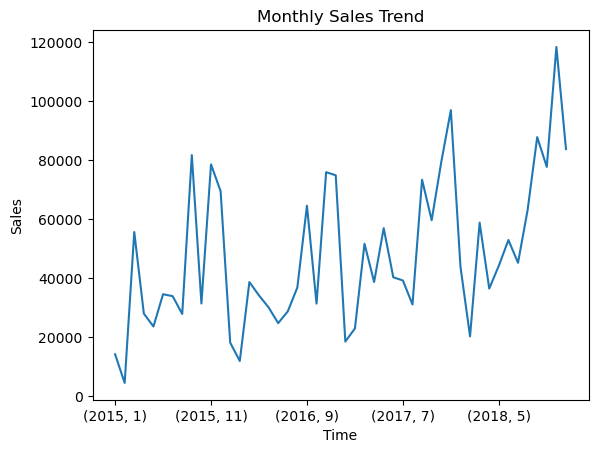

In [30]:
monthly_sales = (
    df.groupby(["order_year", "order_month"])["sales"]
    .sum()
)

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.xticks(rotation = 0)
plt.show()

Observation: Sales exhibit an upward trend over time, indicating overall business growth. Recurring spikes and dips suggest the presence of seasonal demand patterns. Additionally, peak sales values increase in later periods, reflecting
stronger year-over-year performance.

### Sales by Category

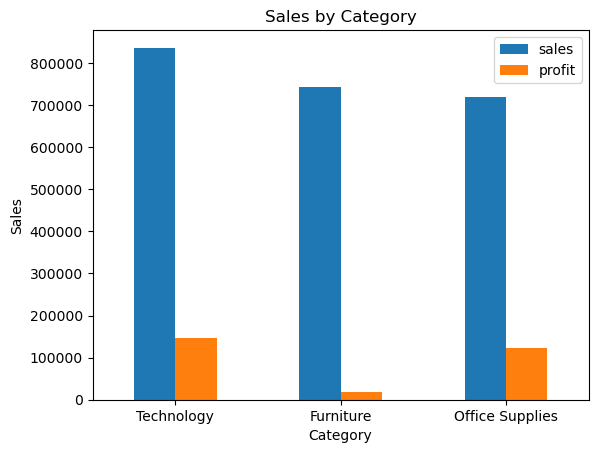

In [31]:
category_sales = df.groupby(["category"])[["sales", "profit"]].sum().sort_values(by = "sales", ascending = False)

category_sales.plot(kind = "bar")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation = 0)
plt.show()

Observation: 
Though the sales of Furniture category is higer, profit generated is least compared to the other two categories which can be observed in its profit percentage value being equal to 2.49%

### Profit by Sub-Category

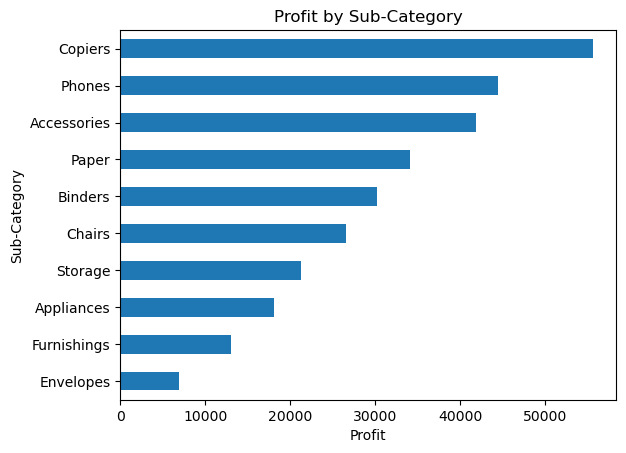

In [32]:
subcat_profit = df.groupby("sub_category")["profit"].sum().sort_values(ascending = False).head(10)

subcat_profit.plot(kind = "barh")
plt.title("Profit by Sub-Category")
plt.ylabel("Sub-Category")
plt.xlabel("Profit")
plt.xticks(rotation = 0)
plt.gca().invert_yaxis()
plt.show()


### Profit Distribution

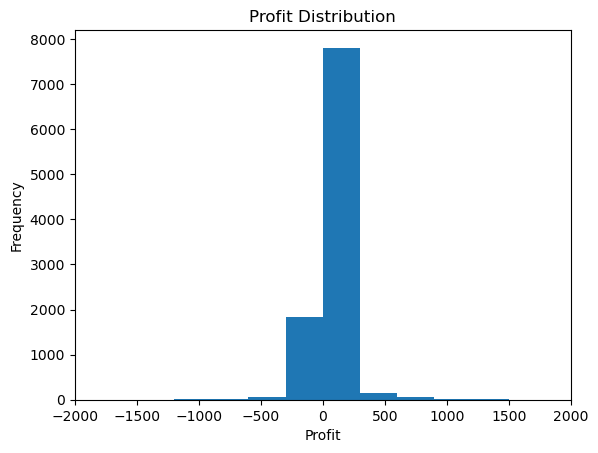

In [33]:
plt.hist(df["profit"], bins=50)
plt.xlim(-2000, 2000)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Observation: The distribution shows that most orders generate a small positive profits, while a
significant number of orders incur losses. A long left tail indicates the
presence of heavily loss-making transactions. High-profit orders are less
frequent, suggesting that overall profitability is driven by a small subset of
orders.

### On average, how profitable is an order when discount is applied?

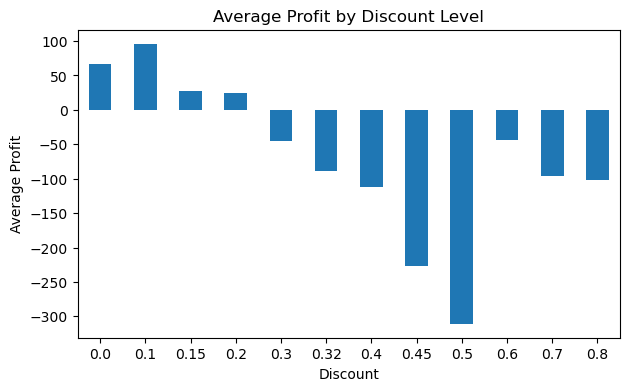

In [34]:
discount_profit = (
    df.groupby("discount")["profit"]
      .mean()
      .round(2)
)

discount_profit.plot(kind="bar", figsize=(7,4))
plt.title("Average Profit by Discount Level")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.xticks(rotation = 0)
plt.show()

Observations:
- Low or no discounts (0%–10%) generate the highest average profit per order.
- Moderate discounts (15%–20%) still remain profitable, but profit per order starts reducing.
- Beyond 30% discount, the average profit turns negative.This means the company is losing money on each order on average.

- High discounts (45%–50%) result in the highest losses per order, indicating heavy margin erosion.

- Higher discounts do not necessarily increase profitability, suggesting discounts are not always driving efficient sales.